In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Input
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ConvNeXtSmall

In [2]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/dl-classificatino-dataset/classification", 
    batch_size=16, 
    image_size=(32, 32), 
    validation_split=0.25, 
    subset="training", 
    seed=42
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/dl-classificatino-dataset/classification", 
    batch_size=16, 
    image_size=(32, 32), 
    validation_split=0.25, 
    subset="validation", 
    seed=42
)


Found 324000 files belonging to 6 classes.
Using 243000 files for training.
Found 324000 files belonging to 6 classes.
Using 81000 files for validation.


In [3]:
conv=ConvNeXtSmall(input_shape=(32,32,3),include_top=False,weights="imagenet")

198551472/198551472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model=Sequential([
    conv,
    Flatten(),
    Dense(128,activation="relu"),
    Dense(6,activation="softmax")
])

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history=model.fit(train_data,epochs=10,validation_data=val_data,batch_size=16)

Epoch 1/10


I0000 00:00:1728309747.894073      74 service.cc:145] XLA service 0x7b76a00059e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728309747.894133      74 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728309747.894137      74 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728309775.953002     140 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_138', 3832 bytes spill stores, 6952 bytes spill loads



    1/15188 ━━━━━━━━━━━━━━━━━━━━ 395:19:24 94s/step - accuracy: 0.2500 - loss: 2.0958

I0000 00:00:1728309792.910308      74 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_97', 160 bytes spill stores, 160 bytes spill loads

I0000 00:00:1728309792.961134      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15186/15188 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9637 - loss: 0.1162

I0000 00:00:1728310328.060671     191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1728310333.012452     190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_138', 3832 bytes spill stores, 6952 bytes spill loads



15188/15188 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9637 - loss: 0.1162

I0000 00:00:1728310349.495078      76 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_90', 160 bytes spill stores, 160 bytes spill loads



15188/15188 ━━━━━━━━━━━━━━━━━━━━ 802s 47ms/step - accuracy: 0.9637 - loss: 0.1161 - val_accuracy: 0.9899 - val_loss: 0.0350
Epoch 2/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 565s 37ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9895 - val_loss: 0.0396
Epoch 3/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 569s 37ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9959 - val_loss: 0.0128
Epoch 4/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 570s 38ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 0.9929 - val_loss: 0.0198
Epoch 5/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 568s 37ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9969 - val_loss: 0.0123
Epoch 6/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 573s 38ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9955 - val_loss: 0.0134
Epoch 7/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 568s 37ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9954 - val_loss: 0.0149
Epoch 8/10
15188/15188 ━━━━━━━━━━━━━━━━━━━━ 564s 37ms/step - accur

In [7]:
model.save("ConvSmall_classification.keras")

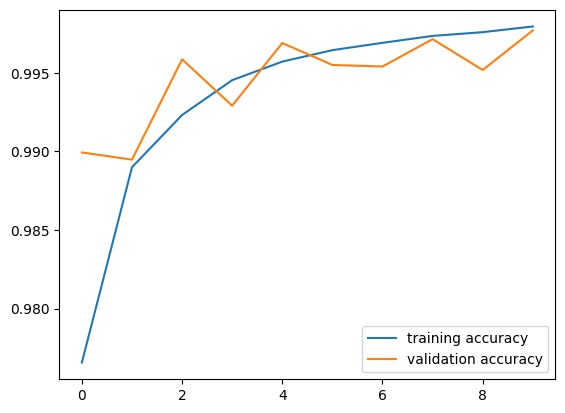

In [8]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

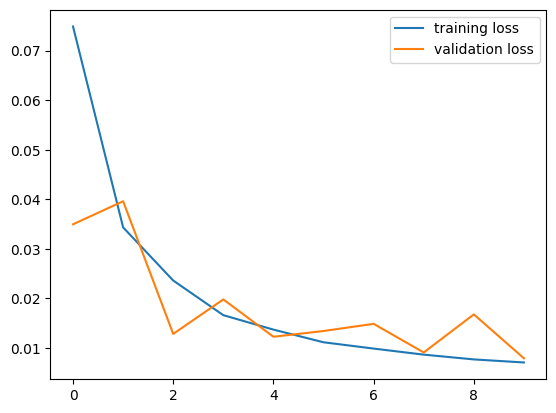

In [9]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()